<div class="alert alert-block alert-info " style=' color:MidnightBlue; background-color: AliceBlue ;  border-radius: 30px; border-color: black; '>
<hr><h1 > Examen d'intelligence artificielle II - MIN 5A -  <img  src="   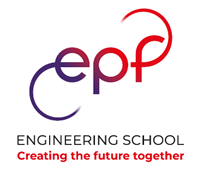" align="right"  width="100" > 
 <br>
     <br>
    <br>
 <hr>
</div>


REN Ying MIN2

<div class="alert alert-block alert-info" style='color:midnightblue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '> 
    <hr><h2>1.	Partie classification </h2><hr>    
    <ol>
Vous allez utiliser pour résoudre un problème de classification la base de données
champignons.csv. Cette base de données comprend des entrées correspondantes à des
caractéristiques de champignons (surface, couleur, etc). La sortie correspond à la comestibilité des
champignons ('p' pour poisonous càd toxique et 'e' pour edible càd commestible).

 <br>
    </ol>
</div>

<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
1.1 Importez les données en utilisant la bibliothèque pandas et la fonction read_csv().<br><br>
1.2 Encodez les données en données chiffres plutôt que des lettres en exécutant les lignes de
code suivantes qui permettent de le faire :
<CODE>
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in raw_data.columns:
    raw_data[col] = labelencoder.fit_transform(raw_data[col])
raw_data.head()
</CODE>
<br>
1.3 La fonction read_csv(), renvoie un DataFrame de plusieurs colonnes. Séparez les deux
variables X et Y en utilisant l’instruction iloc[] de telle sorte que les sorties Y correspondent
à la première colonne càd nom_bd.iloc[:,0] et les autres colonnes restantes correspondent aux
observations X.<br><br>
1.4 Utilisez l’instruction train_test_split pour diviser la base de données X et Y en base
d’apprentissage X_train et Y_train et en base de test X_test et Y_test avec un ratio de taille
de test =0.33 et le paramètre shuffle à True.<br><br>
</div>

In [1]:
#1.1
import numpy as np
import pandas as pd

dataset = pd.read_csv('champignons.csv')
print(dataset.info)

<bound method DataFrame.info of      class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-rin

In [2]:
#1.2
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in dataset.columns:
    dataset[col] = labelencoder.fit_transform(dataset[col])
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [3]:
#1.3
Y=dataset.iloc[:,0]
X=dataset.iloc[:,1:]

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [24]:
#1.4
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,shuffle=True)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(5443, 22) (2681, 22)
(5443,) (2681,)



<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    <B> Méthode 1 </B><br>
    <br>
1.5 Appliquez un classifieur en utilisant SVC avec comme paramètre kernel='linear'.<br><br>
1.6 Entrainez le classifieur sur les données d’apprentissage.<br><br>
1.7 Réalisez la prédiction sur les données de test.<br><br>
1.8 Affichez la matrice de confusion obtenue sur les données de test. <br>
    </div>

In [25]:
#méthode 1

from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,multilabel_confusion_matrix

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(multilabel_confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1364
           1       0.97      0.97      0.97      1317

    accuracy                           0.97      2681
   macro avg       0.97      0.97      0.97      2681
weighted avg       0.97      0.97      0.97      2681

[[1329   35]
 [  41 1276]]
[[[1276   41]
  [  35 1329]]

 [[1329   35]
  [  41 1276]]]



<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    <B> Méthode 2 </B><br>
    <br>
1.9 Implémentez un classifieur via SGDClassifier en prenant comme paramètre random_state=42.<br><br>
1.10 Entrainez le classifieur sur les données d’apprentissage.<br><br>
1.11 Réalisez la prédiction sur les données de test.<br><br>
1.12 Affichez la matrice de confusion obtenue sur les données de test.<br>
    </div>

In [26]:
#méthode 2

from  sklearn.linear_model  import  SGDClassifier
sg_clf = SGDClassifier(random_state=42)
sg_clf.fit(X_train, Y_train)
Y_pred_sg = sg_clf.predict(X_test)

print(classification_report( Y_test ,  Y_pred_sg))
print(confusion_matrix ( Y_test ,  Y_pred_sg))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1364
           1       0.97      0.95      0.96      1317

    accuracy                           0.96      2681
   macro avg       0.96      0.96      0.96      2681
weighted avg       0.96      0.96      0.96      2681

[[1324   40]
 [  63 1254]]



<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    <B> Méthode 3 </B><br>
    <br>
1.13 Créer un classifieur implémenté via LinearSVC en utilisant comme paramètres : C=1,
dual=False, random_state=42, et un nombre d’itérations max = 1200000.<br><br>
1.14 Entrainez le classifieur sur les données d’apprentissage.<br><br>
1.15 Réalisez la prédiction sur les données de test.<br><br>
1.16 Affichez la matrice de confusion obtenue sur les données de test.<br>
    </div>

In [27]:
#méthode 3

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
svm = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1,  dual=False, random_state=42,max_iter=1200000)),])

svm.fit(X_train, Y_train)
Y_predict=svm.predict(X_test)


from  sklearn . metrics  import  confusion_matrix
from sklearn import metrics
print(metrics.classification_report( Y_test ,  Y_predict))
print(confusion_matrix ( Y_test ,  Y_predict))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1364
           1       0.96      0.95      0.95      1317

    accuracy                           0.95      2681
   macro avg       0.95      0.95      0.95      2681
weighted avg       0.95      0.95      0.95      2681

[[1309   55]
 [  72 1245]]



<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    <B> Etude comparative </B><br>
    <br>
1.17 Commentez les résultats obtenus pour les implémentations précédentes en expliquant
d’abord le nom et le principe de base de l’algorithme utilisé puis en présentant et en
discutant les résultats obtenus de chaque matrice de confusion et en fournissant à chaque
fois le nombre de vrais positifs, vrais négatifs, faux positifs et faux négatifs.<br>
    </div>

SVM:
1.Les Support Vector Machines sont appelés en français : Séparateur à Vaste Marge (SVM).
2.Ils font partie des algorithmes d’apprentissage automatique initialement définis pour la discrimination (la prévision
d’une variable qualitative binaire). Puis, ils ont été généralisés à la prévision d’une variable quantitative.

SGDClassifier:

LinearSVC:
ajuste le chemin le + large possible entre les classes = une classification à large marge



In [58]:
#SVM:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, X_train, Y_train, cv=4)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, y_train_pred)
y_train_perfect_predictions = Y_train # lorsqu’on a une prédiction parfaite
confusion_matrix(Y_train, y_train_perfect_predictions)

array([[2844,    0],
       [   0, 2599]], dtype=int64)

In [59]:
#SGDClassifier:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sg_clf, X_train, Y_train, cv=4)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, y_train_pred)
y_train_perfect_predictions = Y_train # lorsqu’on a une prédiction parfaite
confusion_matrix(Y_train, y_train_perfect_predictions)

array([[2844,    0],
       [   0, 2599]], dtype=int64)

In [56]:
#LinearSVC
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm, X_train, Y_train, cv=4)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, y_train_pred)
y_train_perfect_predictions = Y_train # lorsqu’on a une prédiction parfaite
confusion_matrix(Y_train, y_train_perfect_predictions)

array([[2844,    0],
       [   0, 2599]], dtype=int64)


<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    <B> Validation croisée </B><br>
    <br>
1.18 Effectuez une validation croisée sur les données d’apprentissage en important la fonction
cross_val_score() de la librairie sklearn.model_selection et en l’utilisant avec 4 plis et en
choisissant un modèle parmi ceux des implémentations précédentes. Afficher le score de
chacun de ces 4 plis.<br><br>
1.19 Calculer et afficher le score global de la validation croisée sur la base d’apprentissage.<br><br>
1.20 Importez la fonction cross_val_predict() de la librairie sklearn.model_selection. Utiliser cette
fonction sur les données d’apprentissage en utilisant 4 plis et stockez le résultat dans une
variable Y_train_predict.<br><br>
1.21 Affichez la matrice de confusion obtenue sur la base d’apprentissage.<br><br>
1.22 Affichez les scores : prédiction, rappel et f1 sur la base d’apprentissage. Expliquez le but de
la validation croisée et que peut-on déduire des résultats obtenus.<br><br>
1.23 Récupérez les données de prédictions, rappels et thresholds (le seuil de décision) sur la base
d’apprentissage dans le but de tracer dans le même graphique la précision en fonction de
thresholds et le rappel en fonction de thresholds. A quoi correspond ce graphique.<br><br>
1.24 Tracer sur une autre figure la précision en fonction du rappel.<br><br>
1.25 Tracer la courbe ROC. Commentez le résultat de cette courbe.<br>
    </div>

In [30]:
#1.18
from  sklearn . model_selection  import  cross_val_score  
print("cross_val_score = ", cross_val_score(clf,X_train,Y_train,cv=4)) 

#1.19
#le score global = la moyenne des 4 scores précédents
from statistics import mean
print("score global = ",mean(cross_val_score(clf,X_train,Y_train,cv=4)))

cross_val_score =  [0.97281411 0.97207935 0.95811903 0.96176471]
score global =  0.9661942991744824


In [32]:
#1.20 & 1.21
from  sklearn . model_selection  import  cross_val_predict
Y_train_predict = cross_val_predict (clf,  X_train ,  Y_train,  cv=4)  
Y_train_predict

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [34]:
#1.22
from  sklearn.metrics import  precision_score,recall_score,f1_score
print(classification_report(Y_test,Y_pred)
# OU SI VOUS PREFEREZ
print("precision = ",precision_score(Y_test,Y_pred))
print("rappel = ",recall_score(Y_test,Y_pred))
print("f1 = ",f1_score(Y_test,Y_pred))


precision =  0.973302822273074
rappel =  0.9688686408504176
f1 =  0.9710806697108066


Expliquez:
L'objectif de la validation croisée est de tester les performances du modèle avec de nouvelles données qui n'ont pas été utilisées pour former le modèle afin de réduire les problèmes tels que l'ajustement excessif et le biais de sélection,et de donner une indication de la façon dont le modèle se généralise à un ensemble de données indépendant.

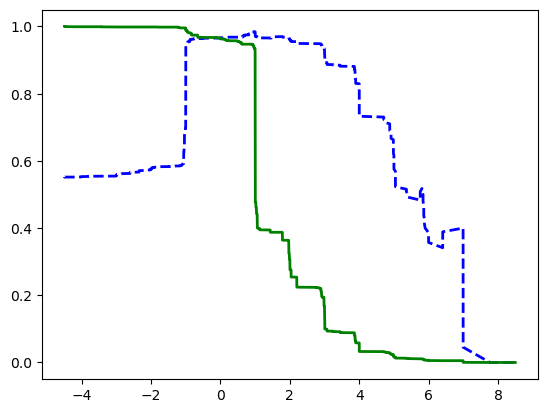

In [54]:
#1.23
Y_scores=cross_val_predict(clf, X_train, Y_train, cv=4,method="decision_function")
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(Y_train, Y_scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision",linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall",linewidth=2)

#Pour chaque observation, il calcule un score basé sur une fonction de décision.
#Si score > seuil , il affecte l’observation à la classe positive, 
#sinon il affecte à la classe négative

Text(0, 0.5, 'taux de vrais positifs')

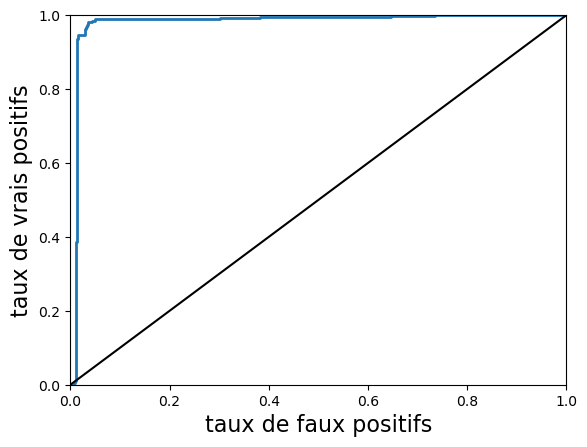

In [44]:
from  sklearn.metrics  import  roc_curve
Y_scores=cross_val_predict(clf, X_train, Y_train, cv=4,method="decision_function")
fpr,tpr,thresholds = roc_curve(Y_train,Y_scores)
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],'k-')
plt.axis([0,1,0,1])
plt.xlabel('taux de faux positifs',fontsize=16)
plt.ylabel('taux de vrais positifs' ,fontsize=16)

<div class="alert alert-block alert-info" style='color:midnightblue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '> 
    <hr><h2>2.	Partie regression </h2><hr>    
    <ol> 
   
Pour cette partie, on vous demande d’utiliser des données synthétiques générées à partir des lignes de code suivantes : 
        
<CODE> 
import numpy as np
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(200, 1), axis=0)
y = np.sin(X).ravel()
y[::1] += 0.2 * (0.5 - rng.rand(200))
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
</CODE> <br>
</ol> 
</div>

In [39]:
import numpy as np

rng = np.random.RandomState(1) 
X = np.sort(5 * rng.rand(200, 1), axis=0)
y = np.sin(X).ravel() 
y[::1] += 0.2 * (0.5 - rng.rand(200)) 
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
Y_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
        <B> Méthode 1 </B><br>
    <br>
2.1 Construire un modèle d’arbre de régression de profondeur 3 pour ces données.<br><br>  
2.2 Entrainer le modèle construit sur la base X, y.<br><br>
2.3 Faites la prédiction sur la base de test pour produire y_predicted<br><br>
2.4 Affichez les données X, y en forme de nuage de points. Affichez le graphe de prédiction
sur le même graphe en rouge.<br>

</div>

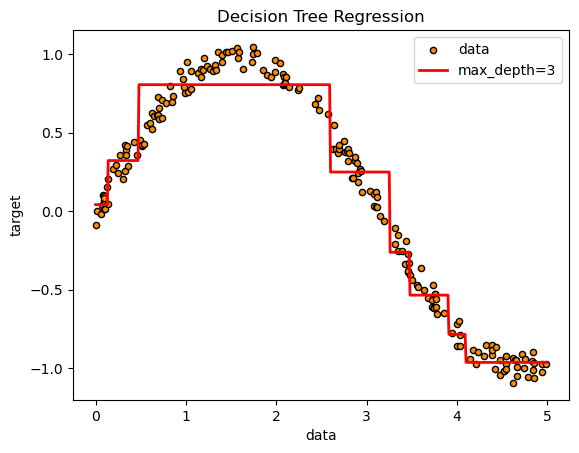

In [40]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Construire un modèle d’arbre de régression de profondeur 3 pour ces données.
regr = DecisionTreeRegressor(max_depth=3)

#2.2 Entrainer le modèle construit sur la base X, y.
regr.fit(X, y)

#2.3 Faites la prédiction sur la base de test pour produire y_predicted
y_predicted = regr.predict(X_test)

#2.4 Affichez les données X, y en forme de nuage de points. Affichez le graphe de prédiction sur le même graphe en rouge.
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")

plt.plot(X_test, y_predicted, color="red",
         label="max_depth=3", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
            <B> Méthode 2 </B><br>
    <br>
2.5 Créez un modèle de régression polynomiale implémenté dans scikit-learn. Expliquez
comment se fait l’implémentation.<br><br>
2.6 Appliquez ce modèle aux données pour l’entrainer sur X, Y.<br><br>
2.7 Faites la prédiction sur X pour produire y_pred_poly.<br><br>
2.8 Affichez sur le graphe des données en affichant les données en forme de nuages de points
et l’allure du modèle en rouge.<br><br>
2.9 Affichez les scores RMSE et R2 entre y_pred_poly et Y.<br><br>
    </div>

r2_score 0.9853242330179017
mean_squared_error 0.00693205132471894


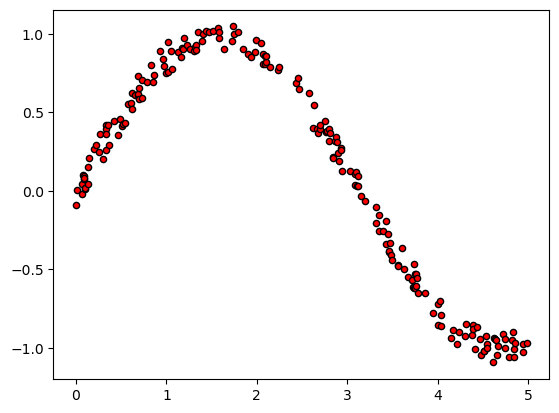

In [42]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#2.5 
#Quadratic polynomial
polynomial = PolynomialFeatures(degree = 3)
#x the polynomial coefficients corresponding to each data
x_transformed = polynomial.fit_transform(X)
 
poly_linear_model = LinearRegression()#Creating regressors

#2.6 
poly_linear_model.fit(x_transformed, y)#Training data
 
xx = np.linspace(30, 400, 100)#Plotting polynomial curve data
xx_transformed = polynomial.fit_transform(xx.reshape(xx.shape[0], 1))# Apply the polynomial feature instances with trained X-values to a series of points to form a matrix

#2.7 
X_tranf = polynomial.fit_transform(X)
y_pred_poly = poly_linear_model.predict(X_tranf)

#2.8 
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="red", label="data")



#2.9 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('r2_score', r2_score(y, y_pred_poly))
print('mean_squared_error', mean_squared_error(y, y_pred_poly))

<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
                <B> Méthode 3 </B><br>
    <br>
2.10 Appliquez l’algo KNN en choisissant K=2 et en entrainant le modèle sur les données X et
y.<br><br>
2.11 Faites la prédiction sur X pour produire y_predknn.<br><br>
2.12 Visualisez ces données en les affichant sous forme de nuage de points. Tracez la courbe
prédictive des données en rouge.<br><br>
2.13 Affichez les scores RMSE et R2 entre y_predknn et y.<br>
    </div>


r2_score 0.9964739172035284
mean_squared_error 0.0016655338661458624


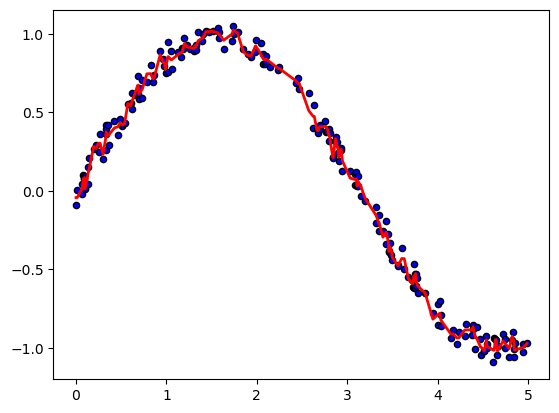

In [50]:
from sklearn.neighbors import KNeighborsRegressor 
from sklearn import preprocessing
from sklearn import utils
#2.10 
knn = KNeighborsRegressor(n_neighbors=2)#k=2

###### ！！！！！·astype（int)· for ValueError: Unknown label type: 'continuous'
####### ！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！#######
knn.fit(X.reshape(X.shape[0], 1), y)
#2.11 Faites la prédiction sur X pour produire y_predknn.
y_predknn = knn.predict(X)

#2.12 
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="b", label="data")
plt.plot(X, y_predknn, color="red",
         label="max_depth=3", linewidth=2)

#2.13 
print('r2_score', r2_score(y, y_predknn))
print('mean_squared_error', mean_squared_error(y, y_predknn))

<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
                <B> Etude comparative </B><br>
    <br>
2.14 Expliquez selon vous quelle méthode est la meilleure pour prédire le salaire du nouvel
employer. Analysez et discutez les résultats obtenus.<br>
        </div>

La régression logistique fonctionne le mieux.
Examen des données prétraitées. Tout d'abord, nous examinons le type de données, le type de données du salaire de l'employé est non linéaire (bien qu'il soit reflété dans la visualisation comme linéaire), et nous voulons faire de la prédiction, pas de la classification, donc nous choisirions d'abord les arbres de décision et la régression logistique. plutôt que KNN.
Mais le temps de décision fournit souvent des données discrètes.
De plus, la régression logistique est bonne pour analyser les relations linéaires, alors que les arbres de décision le sont moins. Bien que le traitement des relations non linéaires soit la force des arbres de décision, de nombreuses relations non linéaires peuvent être parfaitement approximées par des relations linéaires.
J'ai donc choisi d'utiliser la régression logistique comme modèle de prédiction.
Examen des résultats
Bien que KNN ait les meilleurs résultats pour r2, la visualisation montre que KNN a une forte probabilité d'ajustement excessif.
L'arbre de décision est le pire, car il ne fournit que des données discrètes.
Je choisirais donc la régression logistique comme modèle de prédiction.